In [4]:
xywh_list = [1, 2, 3, 4]
z, y, w, h = xywh_list
print(h)

4


In [1]:
try:
    from PIL import Image
except ImportError:
    import Image
import matplotlib.pyplot as plt

import subprocess
import imutils
import shutil
import cv2
import os

In [2]:
import easyocr
reader = easyocr.Reader(['en'])

In [10]:
labels = {
    0: 'label',
    1: 'price',
    2: 'cop',
    3: 'name',
    4: 'barcode'
}

labels_to_show = {
    0: 'label',
    1: 'price',
    2: 'cop',
    3: 'name',
#     4: 'barcode'
}

In [5]:
images_gen = iter(os.listdir('images/'))

In [15]:
image_name = next(images_gen)

In [7]:
# img = cv2.imread('images/' + image_name)
# plt.figure(figsize=(16,8))
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()

In [16]:
try:
    shutil.rmtree('runs/detect/')
except OSError as e:
    print ("Error: %s - %s." % (e.filename, e.strerror))

process = subprocess.run(['python3', 'detect.py', 
                          '--weights', 'weights/best.pt', 
                          '--img', '1024',
                          '--conf', '0.45',
                          '--source', 'images/' + image_name,
                          '--save-txt'],
                                        check=False,
                                        capture_output=True,  
                                        universal_newlines=True)
print(process.stderr)
print(process.stdout)

YOLOv5 v4.0-115-ge931b9d torch 1.7.1+cu110 CUDA:0 (GeForce RTX 2070, 7982.3125MB)

Model Summary: 224 layers, 7064698 parameters, 0 gradients, 16.4 GFLOPS

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.45, device='', exist_ok=False, img_size=1024, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='images/20201109_161129(0).jpg', update=False, view_img=False, weights=['weights/best.pt'])
Fusing layers... 
image 1/1 /home/ihor/Projects/label_detect_ocr/yolov5/images/20201109_161129(0).jpg: 1024x768 1 label, 1 price, 1 cop, 1 name, 1 barcode, Done. (0.017s)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels
Done. (0.407s)



### Easy OCR

______
name
[([[14, 0], [342, 0], [342, 65], [14, 65]], 'MlAIM MIeUI', 0.0050637751999581555), ([[2, 28], [287, 28], [287, 91], [2, 91]], 'MIeIUVII"NLT', 0.00324768940307123)]
______
______
label
[([[274, 54], [554, 54], [554, 211], [274, 211]], '$66', 0.5547616481781006), ([[545, 75], [625, 75], [625, 139], [545, 139]], 'DI', 0.018828757313071934), ([[128, 216], [235, 216], [235, 261], [128, 261]], 'IT7IA', 0.038186584207305904), ([[288, 222], [437, 222], [437, 282], [288, 282]], 'MILUJ:', 0.019719748612860556), ([[621, 219], [691, 219], [691, 263], [621, 263]], 'Hue', 0.2449096023473953), ([[766, 232], [977, 232], [977, 283], [766, 283]], "NIMIYPIIVI'", 0.11467740935837266), ([[241, 267], [311, 267], [311, 305], [241, 305]], 'I|1|"7', 0.01660752263108899), ([[104.07296070401088, 244.08669173125764], [246.9232131676655, 262.1270898638891], [238.92703929598912, 306.91330826874236], [96.0767868323345, 288.8729101361109]], 'Mlulul', 0.7910215511861208)]
______
______
cop
[([[0, 2], [81, 

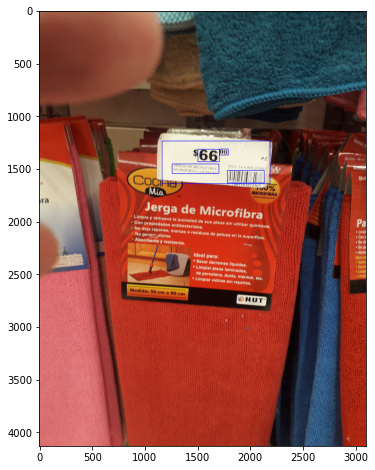

CPU times: user 1.72 s, sys: 82.1 ms, total: 1.8 s
Wall time: 1.76 s


In [17]:
%%time
img = cv2.imread('images/' + image_name)
dh, dw, _ = img.shape

fl = open("runs/detect/exp/labels/" + os.path.splitext(image_name)[0] + '.txt', 'r')
data = fl.readlines()
fl.close()

for dt in data:

    l, x, y, w, h = map(float, dt.split(' '))

    x1 = int((x - w / 2) * dw)
    x2 = int((x + w / 2) * dw)
    y1 = int((y - h / 2) * dh)
    y2 = int((y + h / 2) * dh)
    
    field = labels.get(int(l))
    if labels_to_show.get(int(l)):
        
        crop_img = img[y1:y2, x1:x2]
        result = reader.readtext(crop_img)
        
        print("______")
        print(field)
        print(result)
        print("______")

    if x1 < 0:
        x1 = 0
    if x2 > dw - 1:
        x2 = dw - 1
    if y1 < 0:
        y1 = 0
    if y2 > dh - 1:
        y2 = dh - 1

    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
plt.figure(figsize=(16,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
result = reader.readtext(img)
print(result)

[([[3181, 1229], [3388, 1229], [3388, 1256], [3181, 1256]], 'suiszi5"ol', 0.009674407362378483), ([[1176, 1276], [1332, 1276], [1332, 1367], [1176, 1367]], '44', 0.9677457764405483), ([[1620, 1300], [1669, 1300], [1669, 1333], [1620, 1333]], 'PZ', 0.48304500626384744), ([[3360, 1341], [3411, 1341], [3411, 1380], [3360, 1380]], 'Pz', 0.7528782063438711), ([[964, 1383], [1357, 1383], [1357, 1422], [964, 1422]], 'PISTI TAVQ NIR MUSCULO 4 P', 0.1482028207288535), ([[1404, 1365], [1453, 1365], [1453, 1391], [1404, 1391]], '959', 0.6222780943410805), ([[1475, 1365], [1646, 1365], [1646, 1391], [1475, 1391]], '2AIIIPCJL', 0.06399601598250981), ([[2910, 1330], [3071, 1330], [3071, 1430], [2910, 1430]], '44', 0.9322899876011841), ([[3444, 1379], [3534, 1379], [3534, 1410], [3444, 1410]], 'ASTA', 0.2861512303352356), ([[1886, 1393], [2071, 1393], [2071, 1435], [1886, 1435]], 'DURA HASTA', 0.9379099237141159), ([[3135, 1417], [3414, 1417], [3414, 1446], [3135, 1446]], '9591 27 A MP.04/11/2', 0.31